In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [6]:
data = pd.read_csv('travel.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   date_time                  100000 non-null  object 
 2   site_name                  100000 non-null  int64  
 3   posa_continent             100000 non-null  int64  
 4   user_location_country      100000 non-null  int64  
 5   user_location_region       100000 non-null  int64  
 6   user_location_city         100000 non-null  int64  
 7   orig_destination_distance  63915 non-null   float64
 8   user_id                    100000 non-null  int64  
 9   is_mobile                  100000 non-null  int64  
 10  is_package                 100000 non-null  int64  
 11  channel                    100000 non-null  int64  
 12  srch_ci                    99878 non-null   object 
 13  srch_co                    998

In [8]:
data[['is_mobile', 'is_package', 'is_booking']] = data[['is_mobile', 'is_package', 'is_booking']].astype(bool)

data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce', yearfirst=True)
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['srch_co'] = pd.to_datetime(data['srch_co'], errors='coerce', yearfirst=True)
data['srch_ci'] = pd.to_datetime(data['srch_ci'], errors='coerce', yearfirst=True)

# Adds column for length of stay
srch_length_of_stay = data['srch_co'] - data['srch_ci']
data['srch_length_of_stay'] = srch_length_of_stay

# Adds column for number of people
srch_people_cnt = data['srch_adults_cnt'] + data['srch_children_cnt']
data['srch_people_cnt'] = srch_people_cnt

In [9]:
data.describe()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,channel,...,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month,srch_length_of_stay,srch_people_cnt
count,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99878,100000.000000
mean,1.882530e+07,2014-04-03 07:16:45.412640256,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,5.858590,...,2.577290,1.487980,3.150920,81.093290,598.848330,49.860370,2013.702090,7.129990,3 days 08:58:34.143254770,2.357460
min,1.012000e+03,2013-01-07 00:33:47,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,-114 days +00:00:00,0.000000
25%,9.448967e+06,2013-10-24 19:31:17.249999872,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,2.000000,...,1.000000,1.000000,2.000000,50.000000,158.000000,25.000000,2013.000000,5.000000,1 days 00:00:00,2.000000
50%,1.881212e+07,2014-05-30 09:21:38,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,9.000000,...,1.000000,1.000000,2.000000,50.000000,591.000000,49.000000,2014.000000,7.000000,3 days 00:00:00,2.000000
75%,2.825307e+07,2014-09-18 07:40:03,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,9.000000,...,5.000000,2.000000,4.000000,106.000000,701.000000,73.000000,2014.000000,10.000000,4 days 00:00:00,3.000000
max,3.767009e+07,2014-12-31 23:47:14,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,10.000000,...,9.000000,120.000000,6.000000,212.000000,2117.000000,99.000000,2014.000000,12.000000,196 days 00:00:00,17.000000
std,1.086183e+07,NaN,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,3.722823,...,2.149263,1.280262,1.620534,56.111519,510.959297,28.885423,0.457342,3.266328,3 days 02:10:53.873999803,1.228893


In [10]:
data.shape

(100000, 29)

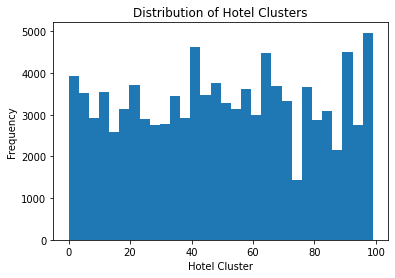

In [11]:
plt.hist(data['hotel_cluster'], bins=30)
plt.xlabel('Hotel Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Hotel Clusters')
plt.show()

In [12]:
missing_values = data['orig_destination_distance'].isnull().sum()
print("Number of missing values in orig_destination_distance:", missing_values)

data_dropped = data.dropna(subset=['orig_destination_distance'])

mean_distance = data['orig_destination_distance'].mean()
data_imputed = data.fillna({'orig_destination_distance': mean_distance})

missing_values_dropped = data_dropped['orig_destination_distance'].isnull().sum()
missing_values_imputed = data_imputed['orig_destination_distance'].isnull().sum()

print("Number of missing values after dropping rows:", missing_values_dropped)
print("Number of missing values after imputation:", missing_values_imputed)

Number of missing values in orig_destination_distance: 36085
Number of missing values after dropping rows: 0
Number of missing values after imputation: 0


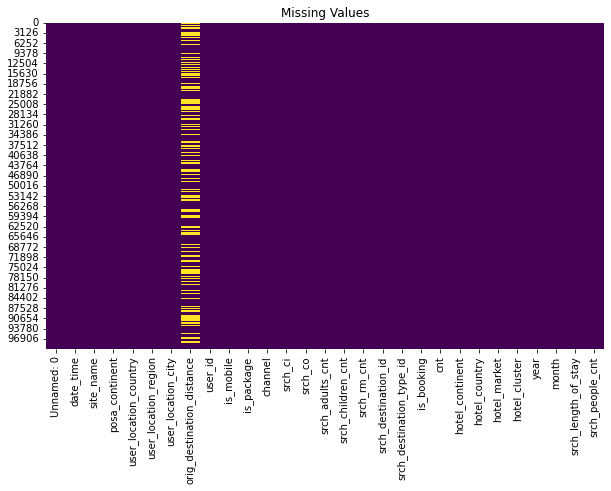

In [13]:
missing_values = data.isnull().sum()

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

In [14]:

features = data[['posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance']]
target = data['is_booking']

features.fillna(features.mean(), inplace=True)


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.07
R-squared Score: 0.00


C:\Users\Personal\AppData\Local\Temp\ipykernel_7648\1832959023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


In [15]:
features = data[['posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance']]
target = data['is_booking']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.27
R-squared Score (R2): -0.01


In [17]:
data.describe(include=['number'])

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,channel,srch_adults_cnt,...,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month,srch_length_of_stay,srch_people_cnt
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99878,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,5.858590,2.020710,...,2.577290,1.487980,3.150920,81.093290,598.848330,49.860370,2013.702090,7.129990,3 days 08:58:34.143254770,2.357460
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,3.722823,0.909774,...,2.149263,1.280262,1.620534,56.111519,510.959297,28.885423,0.457342,3.266328,3 days 02:10:53.873999803,1.228893
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,-114 days +00:00:00,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,2.000000,2.000000,...,1.000000,1.000000,2.000000,50.000000,158.000000,25.000000,2013.000000,5.000000,1 days 00:00:00,2.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,9.000000,2.000000,...,1.000000,1.000000,2.000000,50.000000,591.000000,49.000000,2014.000000,7.000000,3 days 00:00:00,2.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,9.000000,2.000000,...,5.000000,2.000000,4.000000,106.000000,701.000000,73.000000,2014.000000,10.000000,4 days 00:00:00,3.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,10.000000,9.000000,...,9.000000,120.000000,6.000000,212.000000,2117.000000,99.000000,2014.000000,12.000000,196 days 00:00:00,17.000000


In [18]:
data.describe(include=['datetime'])

,date_time,srch_ci,srch_co
count,100000,99878,99878
mean,2014-04-03 07:16:45.412640256,2014-05-28 05:17:03.432587776,2014-05-31 14:15:37.575842304
min,2013-01-07 00:33:47,2013-01-07 00:00:00,2013-01-08 00:00:00
25%,2013-10-24 19:31:17.249999872,2013-12-23 00:00:00,2013-12-27 00:00:00
50%,2014-05-30 09:21:38,2014-07-17 00:00:00,2014-07-20 00:00:00
75%,2014-09-18 07:40:03,2014-11-09 00:00:00,2014-11-13 00:00:00
max,2014-12-31 23:47:14,2016-05-10 00:00:00,2016-05-13 00:00:00


In [19]:
data.describe(include=['bool'])

,is_mobile,is_package,is_booking
count,100000,100000,100000
unique,2,2,2
top,False,False,False
freq,86623,75186,92007


In [20]:
data.mode()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month,srch_length_of_stay,srch_people_cnt
0,1012,2013-05-20 05:16:42,2.0,3.0,66.0,174.0,5703.0,0.3936,783124.0,False,...,False,1.0,2.0,50.0,628.0,91.0,2014.0,7.0,1 days,2.0
1,1014,2013-08-02 15:56:38,NaN,NaN,NaN,NaN,NaN,42.9461,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,1439,2013-08-20 14:47:34,NaN,NaN,NaN,NaN,NaN,97.7308,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,2680,2013-08-22 13:08:12,NaN,NaN,NaN,NaN,NaN,227.2723,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,3174,2013-09-04 18:27:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37669054,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
99996,37669173,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
99997,37670034,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
99998,37670050,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


Axes(0.125,0.125;0.62x0.755)


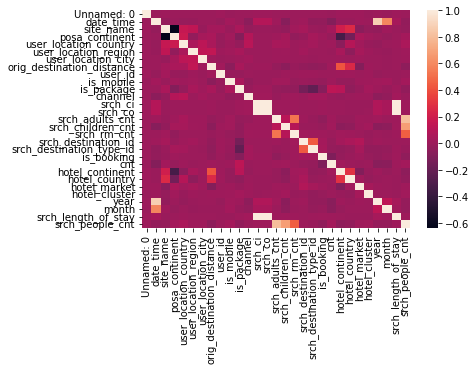

In [25]:
pearson_corr = data.corr()
seaborn_corr = sb.heatmap(pearson_corr,xticklabels=pearson_corr.columns.values, yticklabels=pearson_corr.columns.values)
print(seaborn_corr)


In [30]:
train_cat = data[['hotel_cluster', 'site_name', 'posa_continent','srch_destination_id', 'channel', 'srch_rm_cnt', 'is_booking']]

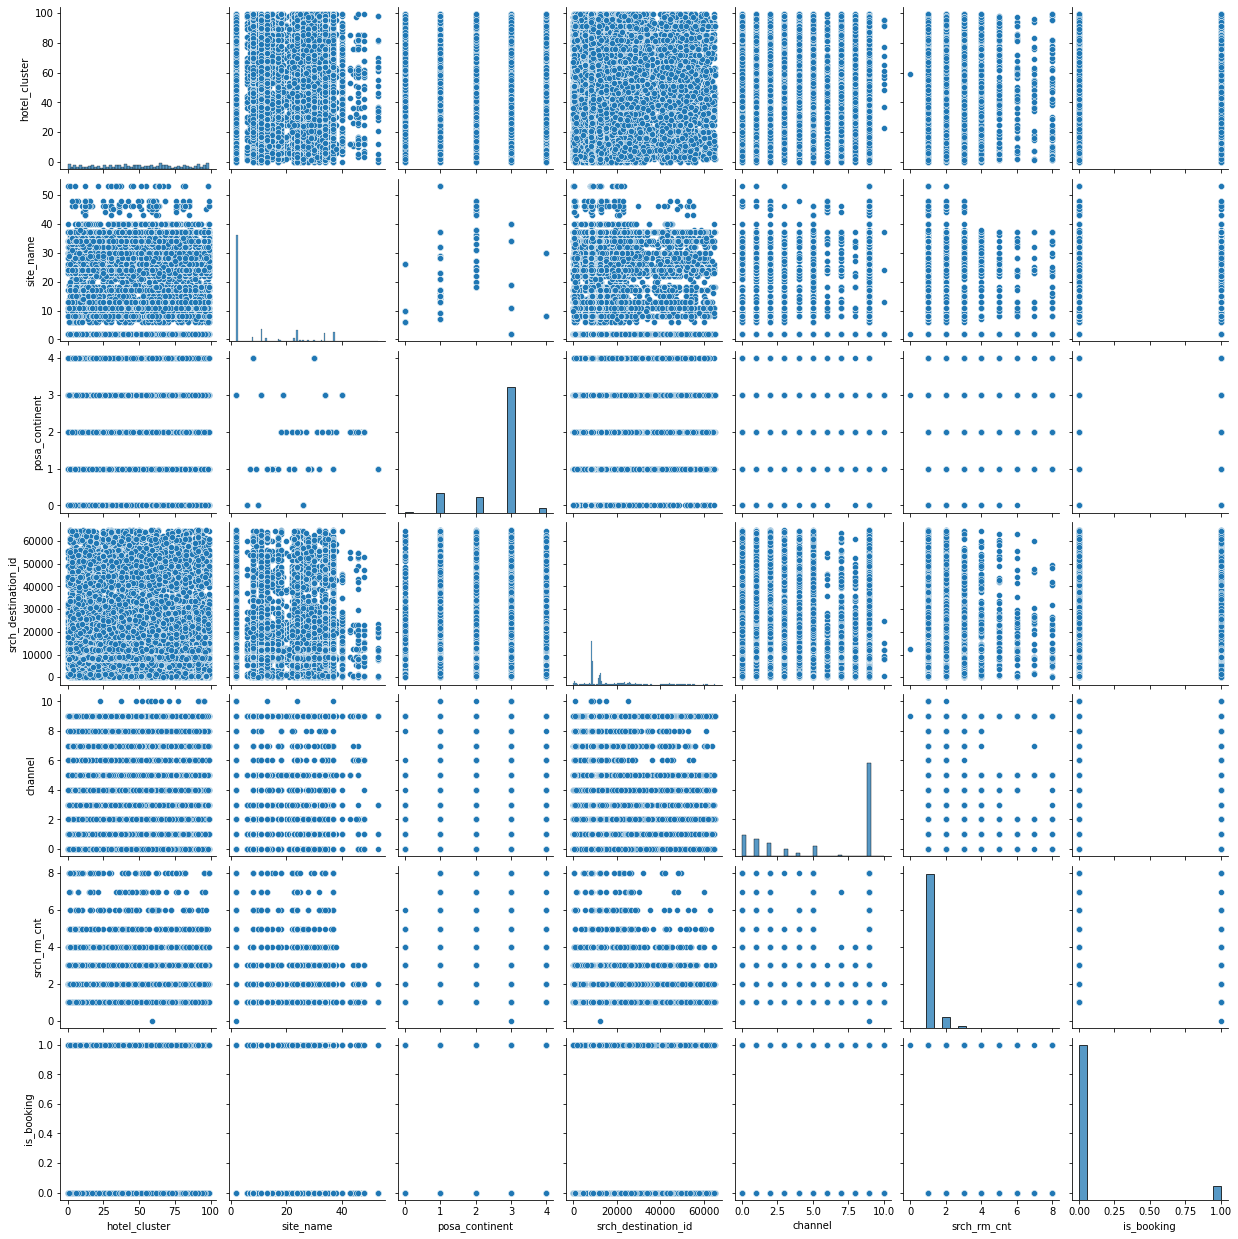

In [32]:
sb.pairplot(train_cat)

In [35]:
hotel_cluster_groups = train_cat.groupby(data['hotel_cluster'])
hotel_cluster_groups.mean()

,hotel_cluster,site_name,posa_continent,srch_destination_id,channel,srch_rm_cnt,is_booking
hotel_cluster,,,,,,,
0,0.0,6.510747,2.873081,11003.156602,5.899693,1.085977,0.052201
1,1.0,7.181230,2.851133,10039.257282,6.216019,1.131068,0.082524
2,2.0,13.148841,2.494652,14470.551693,5.836007,1.132799,0.094474
3,3.0,11.776632,2.486254,17955.953608,5.817869,1.063574,0.056701
4,4.0,7.937976,2.855277,13791.527748,5.979325,1.137106,0.114255
...,...,...,...,...,...,...,...
95,95.0,9.075812,2.862816,12820.299639,6.150903,1.109025,0.117690
96,96.0,6.105419,2.904433,13430.192118,5.833498,1.097537,0.053202
97,97.0,11.323978,2.598236,10867.162791,5.963913,1.091419,0.058540
